<a href="https://colab.research.google.com/github/bomij33/With-GANADA/blob/bomi/code/audio_classification_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 버전 다운로드 2.8.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 4.3 MB/s 


In [ ]:
# restart 후 확인
import tensorflow as tf
print(tf.__version__)

2.8.2


# 데이터 로딩

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import IPython
import librosa
SAMPLING_RATE = 22050

In [ ]:
import glob

file_list = glob.glob("/gdrive/MyDrive/Audio/C/*.wav")  # 0 : 부모, 1 : 까치, 2 : 의자 
print(len(file_list))
print(file_list[:3]) 

1226
['/gdrive/MyDrive/Audio/C/01_227.wav', '/gdrive/MyDrive/Audio/C/01_228.wav', '/gdrive/MyDrive/Audio/C/01_229.wav']


In [ ]:
def load_wav(file_name):
    data, _ = librosa.load(file_name, sr=SAMPLING_RATE)
    return data

raw_x = [] # data
raw_y = [] # label
for file_name in file_list:
    label = int(file_name.split("/")[-1].split("_")[0])  

    print(file_name, label)
    data = load_wav(file_name)
    raw_x.append(data)
    raw_y.append(label)


/gdrive/MyDrive/Audio/C/01_227.wav 1
/gdrive/MyDrive/Audio/C/01_228.wav 1
/gdrive/MyDrive/Audio/C/01_229.wav 1
/gdrive/MyDrive/Audio/C/01_230.wav 1
/gdrive/MyDrive/Audio/C/01_231.wav 1
/gdrive/MyDrive/Audio/C/01_232.wav 1
/gdrive/MyDrive/Audio/C/01_233.wav 1
/gdrive/MyDrive/Audio/C/01_234.wav 1
/gdrive/MyDrive/Audio/C/01_235.wav 1
/gdrive/MyDrive/Audio/C/01_236.wav 1
/gdrive/MyDrive/Audio/C/01_237.wav 1
/gdrive/MyDrive/Audio/C/01_238.wav 1
/gdrive/MyDrive/Audio/C/01_239.wav 1
/gdrive/MyDrive/Audio/C/01_240.wav 1
/gdrive/MyDrive/Audio/C/01_241.wav 1
/gdrive/MyDrive/Audio/C/01_242.wav 1
/gdrive/MyDrive/Audio/C/01_243.wav 1
/gdrive/MyDrive/Audio/C/01_244.wav 1
/gdrive/MyDrive/Audio/C/01_245.wav 1
/gdrive/MyDrive/Audio/C/01_246.wav 1
/gdrive/MyDrive/Audio/C/01_247.wav 1
/gdrive/MyDrive/Audio/C/01_248.wav 1
/gdrive/MyDrive/Audio/C/01_249.wav 1
/gdrive/MyDrive/Audio/C/01_250.wav 1
/gdrive/MyDrive/Audio/C/01_251.wav 1
/gdrive/MyDrive/Audio/C/01_253.wav 1
/gdrive/MyDrive/Audio/C/01_252.wav 1
/

In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [ ]:
from collections import Counter
Counter(raw_y)


Counter({1: 409, 2: 420, 0: 397})

# padding

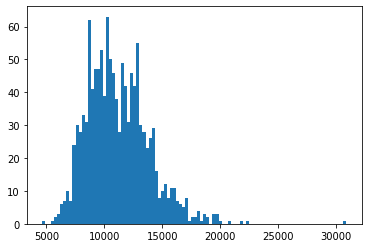

In [ ]:
lens = []
for i in range(len(raw_x)):
    lens.append(len(raw_x[i]))

plt.hist(lens, bins=100)
plt.show()

In [ ]:
print(lens[:10])

[9702, 10364, 9702, 13451, 13671, 12569, 12128, 11907, 12348, 12569]


In [ ]:
from tensorflow.keras.preprocessing import sequence

padded_raw_x = sequence.pad_sequences(raw_x, maxlen=22050, padding='post', dtype=float)
# 파일 길이를 똑같이 맞춤 22050 (1초로)

In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [ ]:
raw_x = np.array(padded_raw_x)
raw_y = np.array(raw_y)
print(raw_x.shape)  
print(raw_y.shape)

(1226, 22050)
(1226,)


In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


# Normalization

In [ ]:
max = np.max(raw_x)
min = np.min(raw_x)
print(min, max)

-1.0326271057128906 1.1331255435943604


In [ ]:
# raw_x = (raw_x - min) / (max - min)

# 2차원으로 reshape

In [ ]:
print(raw_x.shape)
raw_x = raw_x.reshape((len(raw_x),-1,1))
print(raw_x.shape)

(1226, 22050)
(1226, 22050, 1)


# 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, shuffle=True)

In [ ]:
print(len(train_y))
print(train_y[len(train_y)-1])
IPython.display.Audio(train_x[len(train_y)-1].squeeze(), rate=SAMPLING_RATE)

980
2


In [ ]:
print(train_y[1])
IPython.display.Audio(train_x[1].squeeze(), rate=SAMPLING_RATE)

1


In [ ]:
print(train_x.shape)
print(train_y.shape)


(980, 22050, 1)
(980,)


In [ ]:
# loss graph를 학습하면서 실시간으로 그리는 방법

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("epochs = ", self.epochs[-1], "loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input, Activation
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Conv1D, MaxPooling1D, AveragePooling1D, Add, MaxPool1D
from tensorflow.keras.layers import Dropout, GaussianNoise, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

input_shape = train_x.shape[1:]
num_classes = 3  # C 폴더 [0: 나무, 1:까치, 2:의자]

model = keras.Sequential()
model.add(Input(input_shape))

model.add(Conv1D(32, 9, padding="same", activation="relu"))  
model.add(Conv1D(32, 9, padding="same", activation="relu")) 
model.add(MaxPooling1D())

model.add(Conv1D(64, 9, padding="same", activation="relu"))  
model.add(Conv1D(64, 9, padding="same", activation="relu"))  
model.add(MaxPooling1D())

model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(MaxPooling1D())

model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu")) #, kernel_regularizer=l2()))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation="softmax"))  

from tensorflow.keras.optimizers import Adam, Adadelta, SGD
optimizer = Adam(learning_rate=0.001*0.1, decay=0.01) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22050, 32)         320       
                                                                 
 conv1d_1 (Conv1D)           (None, 22050, 32)         9248      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11025, 32)        0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 11025, 64)         18496     
                                                                 
 conv1d_3 (Conv1D)           (None, 11025, 64)         36928     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5512, 64)         0         
 1D)                                                    

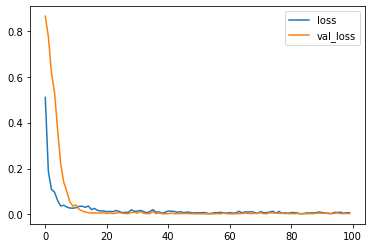

epochs =  99 loss =  0.007293646223843098 , val_loss =  0.00369760999456048
56/56 [==============================] - 7s 133ms/step - loss: 0.0073 - acc: 0.9989 - val_loss: 0.0037 - val_acc: 1.0000


In [ ]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])

8/8 [==============================] - 1s 71ms/step - loss: 0.0157 - acc: 0.9919
loss= 0.015708377584815025
acc= 0.9918699264526367


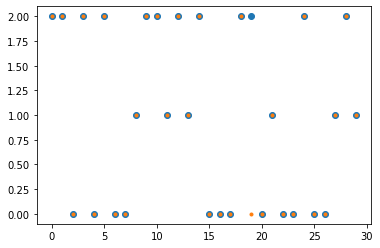

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()


In [ ]:
model.save('../gdrive/MyDrive/Audio/model/ganada_C.h5')